<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: **<font color='blue'>Matin Alinejad**

**Student ID**: **<font color='green'>99101943**



## **Briefing:**
 **In this section, we are going to investigate linear regression and its extensions ridge and lasso shrinkage methods in Boston dataset.**

In [36]:
## Import necessary libraries here ##

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

**Part 1:**
First familiarize yourself with Boston dataset. Briefly explain its features and dataset's shape. You are provided with the required dataset named **boston.csv**.

In [2]:
## Write your code here ##

# Reading the dataset
Boston_data = pd.read_csv("Boston.csv")

# Displaying the first few rows of the dataset
print(Boston_data.head(), "\n")

# Getting the shape of the dataset
print("Shape of the dataset:", Boston_data.shape)

      CRIM    ZN  INDUS  CHAS     NX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2   

Shape of the dataset: (506, 14)


**Part 2:**
Split dataset into train and test sets. Train linear regression model using all of the features. Report $R^2$ and RMSE error metrics for both train and test sets. Also report all of the coefficients.

In [3]:
## Write your code here ##

# Splitting the data into training and testing sets (80% train, 20% test)
X = Boston_data.drop("MEDV", axis = 1)  # Features
y = Boston_data["MEDV"]                 # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the target variable for both training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculating R^2 and RMSE for the training set
r2_train = r2_score(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared = False)

# Calculating R^2 and RMSE for the testing set
r2_test = r2_score(y_test, y_test_pred)
rmse_test = mean_squared_error(y_test, y_test_pred, squared = False)

# Printing the results
print("Training set R^2: {:.2f}".format(r2_train))
print("Training set RMSE: {:.2f}".format(rmse_train))
print("Testing set R^2: {:.2f}".format(r2_test))
print("Testing set RMSE: {:.2f}".format(rmse_test))

# Displaying the coefficients of the model
coefficients = pd.DataFrame(model.coef_, X.columns, columns = ['Coefficient'])
print(coefficients)

Training set R^2: 0.75
Training set RMSE: 4.65
Testing set R^2: 0.67
Testing set RMSE: 4.93
         Coefficient
CRIM       -0.113056
ZN          0.030110
INDUS       0.040381
CHAS        2.784438
NX        -17.202633
RM          4.438835
AGE        -0.006296
DIS        -1.447865
RAD         0.262430
TAX        -0.010647
PTRATIO    -0.915456
B           0.012351
LSTAT      -0.508571


**Part 3:**
Now, we want to see the effect of ridge regression on learning process. To do so, set the alphas parameter as follows for synchronization:$$ alphas = 10*np.linspace (3,-3,100) *0.5$$

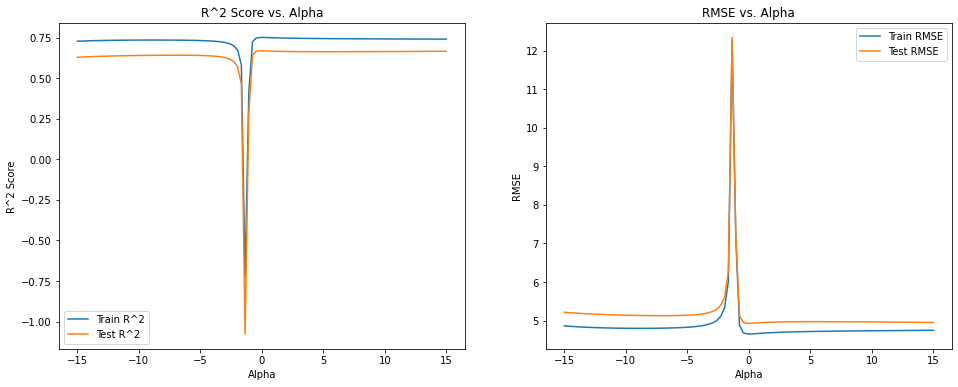

In [4]:
## Write your code here ##

# Define the alphas for Ridge regression
alphas = 10 * np.linspace(3, -3, 100) * 0.5

# Lists to store the results
train_r2 = []
test_r2 = []
train_rmse = []
test_rmse = []

# Looping over the different values of alpha
for alpha in alphas:
    # Creating and training the Ridge regression model
    model = Ridge(alpha = alpha)
    model.fit(X_train, y_train)
    
    # Predicting the target variable for both training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculating R^2 and RMSE for the training set
    train_r2.append(r2_score(y_train, y_train_pred))
    train_rmse.append(mean_squared_error(y_train, y_train_pred, squared = False))
    
    # Calculating R^2 and RMSE for the testing set
    test_r2.append(r2_score(y_test, y_test_pred))
    test_rmse.append(mean_squared_error(y_test, y_test_pred, squared = False))

# Plotting R^2 and RMSE for training and testing sets across different alphas
fig, ax = plt.subplots(1, 2, figsize = (16, 6))
ax[0].plot(alphas, train_r2, label = 'Train R^2')
ax[0].plot(alphas, test_r2, label = 'Test R^2')
ax[0].set_title('R^2 Score vs. Alpha')
ax[0].set_xlabel('Alpha')
ax[0].set_ylabel('R^2 Score')
ax[0].legend()

ax[1].plot(alphas, train_rmse, label = 'Train RMSE')
ax[1].plot(alphas, test_rmse, label = 'Test RMSE')
ax[1].set_title('RMSE vs. Alpha')
ax[1].set_xlabel('Alpha')
ax[1].set_ylabel('RMSE')
ax[1].legend()

plt.show()

 Now, plot the following in separate plots:

1- MSE for train and test versus $\alpha$

2- Coefficients versus $\alpha$

3- Number of not-considered features versus $\alpha$

Finally select the optimal value of $\alpha$. Report MSE, $R^2$ and coefficients. Compare this case with the linear regression case.

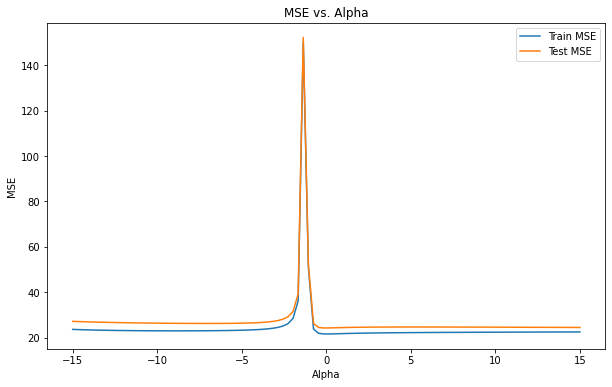

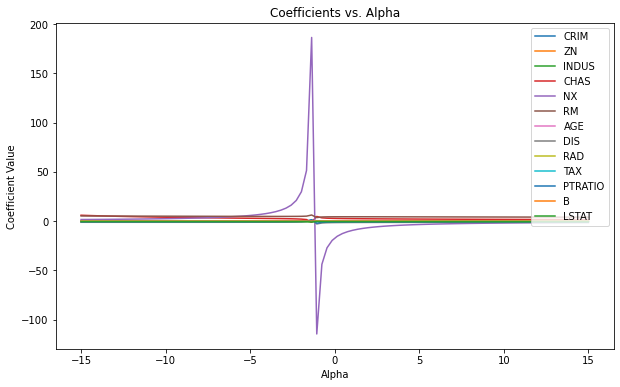

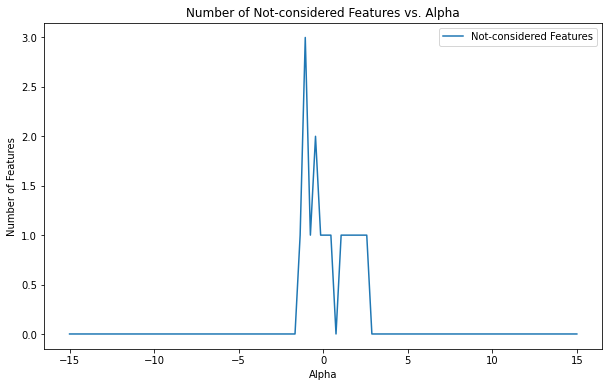

Optimal Alpha: -0.15
Test MSE: 24.30
Test R^2: 0.67
Coefficients:
          Coefficient
CRIM       -0.114288
ZN          0.029467
INDUS       0.050599
CHAS        2.844834
NX        -19.583416
RM          4.424501
AGE        -0.004405
DIS        -1.481903
RAD         0.266944
TAX        -0.010401
PTRATIO    -0.942917
B           0.012259
LSTAT      -0.504343

Linear Regression Test R^2: 0.67
Linear Regression Test RMSE: 4.93


In [5]:
## Write your code here ##

# Lists to store the results
train_mse = []
test_mse = []
coefficients = []
features_not_considered = []

# Looping over the different values of alpha
for alpha in alphas:
    model = Ridge(alpha = alpha)
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))
    coefficients.append(model.coef_)
    
    # Count features with coefficients near zero
    features_not_considered.append(np.sum(np.abs(model.coef_) < 0.01))

# Plotting MSE for train and test sets
plt.figure(figsize = (10, 6))
plt.plot(alphas, train_mse, label = 'Train MSE')
plt.plot(alphas, test_mse, label = 'Test MSE')
plt.title('MSE vs. Alpha')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.legend()
plt.show()

# Plotting coefficients versus alphas
plt.figure(figsize = (10, 6))
coefficients = np.array(coefficients).T  # Transpose to plot each feature
for i in range(coefficients.shape[0]):
    plt.plot(alphas, coefficients[i], label = X.columns[i])
plt.title('Coefficients vs. Alpha')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.legend()
plt.show()

# Plotting number of not-considered features versus alphas
plt.figure(figsize = (10, 6))
plt.plot(alphas, features_not_considered, label = 'Not-considered Features')
plt.title('Number of Not-considered Features vs. Alpha')
plt.xlabel('Alpha')
plt.ylabel('Number of Features')
plt.legend()
plt.show()

# Selecting the optimal alpha based on the minimum test MSE
optimal_alpha = alphas[np.argmin(test_mse)]
optimal_model = Ridge(alpha = optimal_alpha)
optimal_model.fit(X_train, y_train)
optimal_y_test_pred = optimal_model.predict(X_test)
optimal_mse = mean_squared_error(y_test, optimal_y_test_pred)
optimal_r2 = r2_score(y_test, optimal_y_test_pred)

# Displaying the results
print("Optimal Alpha: {:.2f}".format(optimal_alpha))
print("Test MSE: {:.2f}".format(optimal_mse))
print("Test R^2: {:.2f}".format(optimal_r2))
print("Coefficients:\n", pd.DataFrame(optimal_model.coef_, index = X.columns, columns = ['Coefficient']))

# Comparing with Linear Regression (previously calculated values)
print("\nLinear Regression Test R^2: {:.2f}".format(r2_test))
print("Linear Regression Test RMSE: {:.2f}".format(rmse_test))


**Part 4:**
Repeat Part 3 with lasso regression. Where do you think we should consider using lasso regression?
<font color='green'>

Lasso regression is particularly useful when dealing with datasets that have many features, some of which may be irrelevant or redundant. It can help in feature selection by driving the coefficients of irrelevant features to zero, thus simplifying the model and potentially improving its interpretability and generalization performance. Lasso can be particularly useful in cases where model interpretability and feature selection are crucial, as it tends to zero out the less important features' coefficients.
  
Lasso Regression is particularly useful in scenarios where:
<font color='blue'>

**Feature Selection:** <font color='green'>Lasso helps in reducing the number of predictor variables included in the model by shrinking the coefficients of less important features to zero.
<font color='blue'>

**Model Interpretability:** <font color='green'>With fewer features, the model becomes easier to understand and interpret.
<font color='blue'>
    
**Preventing Overfitting:** <font color='green'>Lasso includes regularization which helps in preventing the model from fitting too closely to the training data.
<font color='blue'>
    
**Handling Multicollinearity:** <font color='green'>It can handle cases where there are high correlations among the predictor variables by selecting one of them and shrinking the others to zero.

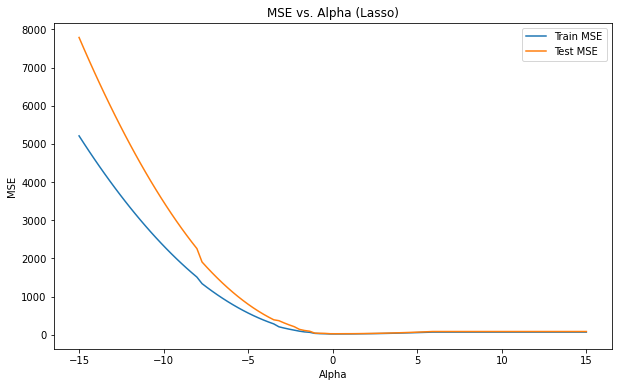

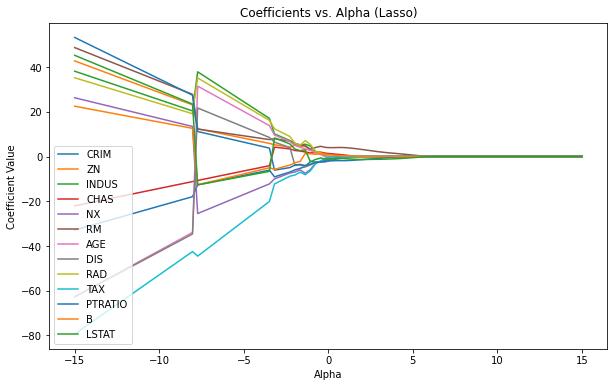

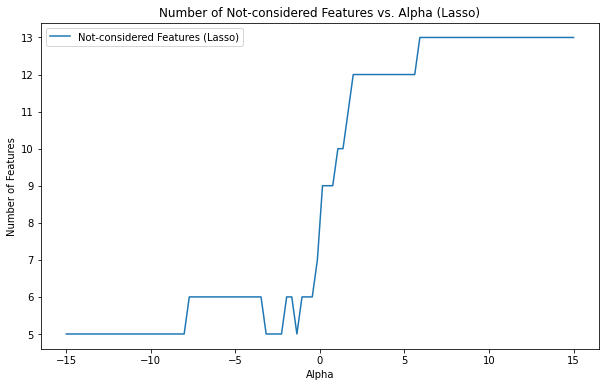

Optimal Alpha: 0.15
Test MSE: 25.59
Test R^2: 0.71
Coefficients:
          Coefficient
CRIM       -0.125109
ZN          0.027696
INDUS       0.066940
CHAS        2.293387
NX         -0.000000
RM          4.385411
AGE        -0.043632
DIS        -1.029360
RAD         0.067915
TAX        -0.001803
PTRATIO    -0.918321
B           0.011319
LSTAT      -0.455567


In [35]:
## Write you code here ##

# Scaling the features before applying Lasso
scaler = StandardScaler()
lasso_model = Lasso(max_iter = 200000, tol = 0.5)  # Increase max_iter and adjust tolerance

# Create a pipeline that first scales the data then applies Lasso
pipeline = Pipeline([
    ('scaler', scaler),
    ('lasso', lasso_model)
])

# Lists to store the results
train_mse = []
test_mse = []
coefficients = []
features_not_considered = []

# Looping over the different values of alpha
for alpha in alphas:
    lasso_model.set_params(alpha = alpha)
    pipeline.fit(X_train, y_train)

    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))
    coefficients.append(pipeline.named_steps['lasso'].coef_)
    
    # Count features with coefficients near zero
    features_not_considered.append(np.sum(pipeline.named_steps['lasso'].coef_ < 0.01))


# Plotting MSE for train and test sets
plt.figure(figsize = (10, 6))
plt.plot(alphas, train_mse, label = 'Train MSE')
plt.plot(alphas, test_mse, label = 'Test MSE')
plt.title('MSE vs. Alpha (Lasso)')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.legend()
plt.show()

# Plotting coefficients versus alphas
plt.figure(figsize = (10, 6))
coefficients = np.array(coefficients).T  # Transpose to plot each feature
for i in range(coefficients.shape[0]):
    plt.plot(alphas, coefficients[i], label = X.columns[i])
plt.title('Coefficients vs. Alpha (Lasso)')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.legend()
plt.show()

# Plotting number of not-considered features versus alphas
plt.figure(figsize = (10, 6))
plt.plot(alphas, features_not_considered, label = 'Not-considered Features (Lasso)')
plt.title('Number of Not-considered Features vs. Alpha (Lasso)')
plt.xlabel('Alpha')
plt.ylabel('Number of Features')
plt.legend()
plt.show()

# Selecting the optimal alpha based on the minimum test MSE
optimal_alpha = alphas[np.argmin(test_mse)]
optimal_model = Lasso(alpha = optimal_alpha)
optimal_model.fit(X_train, y_train)
optimal_y_test_pred = optimal_model.predict(X_test)
optimal_mse = mean_squared_error(y_test, optimal_y_test_pred)
optimal_r2 = r2_score(y_test, optimal_y_test_pred)

# Displaying the results
print("Optimal Alpha: {:.2f}".format(optimal_alpha))
print("Test MSE: {:.2f}".format(optimal_mse))
print("Test R^2: {:.2f}".format(optimal_r2))
print("Coefficients:\n", pd.DataFrame(optimal_model.coef_, index = X.columns, columns = ['Coefficient']))

**Part 5:**
In this part, we intend to see the effect of ridge and lasso regression methods in overfitting prevention. In order to do this, change the ratio of training data to the whole data from low to high. As you know, the lower the ratio of trainig data, the more likely the overfitting would be. for each ratio, fit linear regression, ridge regression and lasso regression to data and then plot the following:

1- $R^2$ for test data versus ratio of training data (Three methods in one plot)

2- Selected α value versus training data ratio for ridge and lasso regression methods (In one plot)

How is the overall behavior of these plots and how do you analyze them?

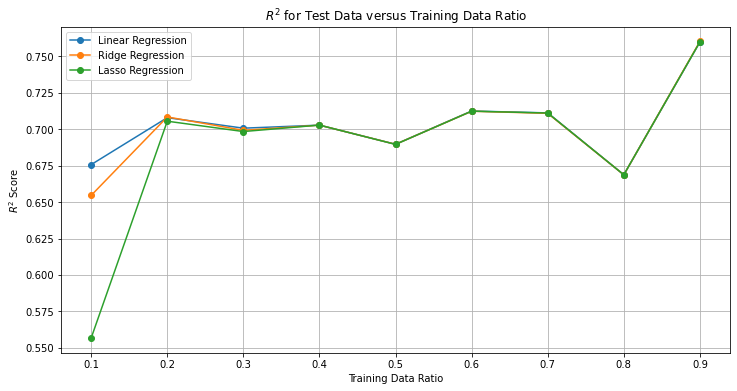

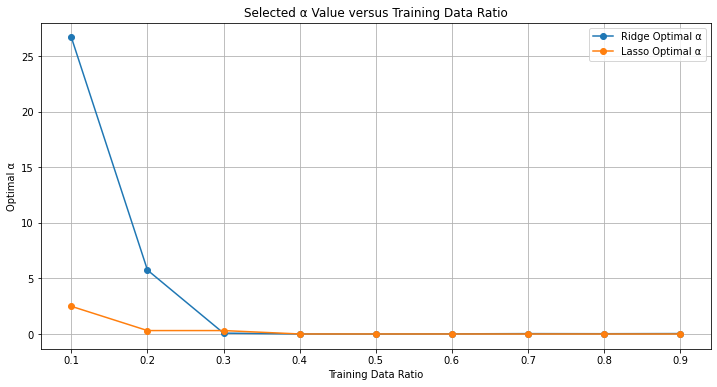

In [40]:
## Write you code here ##

# Define the range of training data ratios from 10% to 90%
training_ratios = np.linspace(0.1, 0.9, 9)

# Define a range of alpha values for Ridge and Lasso
alpha_values = 10 ** np.linspace(3, -3, 100) * 0.5

# Initialize lists to store results
test_r2_linear = []
test_r2_ridge = []
test_r2_lasso = []
optimal_alpha_ridge = []
optimal_alpha_lasso = []

# Loop over the training ratios
for ratio in training_ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = ratio, random_state = 42)
    
    # Linear Regression
    model_linear = LinearRegression()
    model_linear.fit(X_train, y_train)
    test_r2_linear.append(r2_score(y_test, model_linear.predict(X_test)))
    
    # Ridge Regression
    model_ridge = RidgeCV(alphas=alpha_values, store_cv_values = True)
    model_ridge.fit(X_train, y_train)
    test_r2_ridge.append(r2_score(y_test, model_ridge.predict(X_test)))
    optimal_alpha_ridge.append(model_ridge.alpha_)
    
    # Lasso Regression
    model_lasso = LassoCV(alphas = alpha_values)
    model_lasso.fit(X_train, y_train)
    test_r2_lasso.append(r2_score(y_test, model_lasso.predict(X_test)))
    optimal_alpha_lasso.append(model_lasso.alpha_)

# Plotting R^2 for test data versus training data ratio
plt.figure(figsize=(12, 6))
plt.plot(training_ratios, test_r2_linear, label = 'Linear Regression', marker = 'o')
plt.plot(training_ratios, test_r2_ridge, label = 'Ridge Regression', marker = 'o')
plt.plot(training_ratios, test_r2_lasso, label = 'Lasso Regression', marker = 'o')
plt.title('$R^2$ for Test Data versus Training Data Ratio')
plt.xlabel('Training Data Ratio')
plt.ylabel('$R^2$ Score')
plt.legend()
plt.grid(True)
plt.show()

# Plotting selected alpha values versus training data ratio
plt.figure(figsize=(12, 6))
plt.plot(training_ratios, optimal_alpha_ridge, label = 'Ridge Optimal α', marker = 'o')
plt.plot(training_ratios, optimal_alpha_lasso, label = 'Lasso Optimal α', marker = 'o')
plt.title('Selected α Value versus Training Data Ratio')
plt.xlabel('Training Data Ratio')
plt.ylabel('Optimal α')
plt.legend()
plt.grid(True)
plt.show()